In [23]:
# 準備
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
import mglearn
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as fp

# matplotlib用ラベル日本語化設定
JP = fp(fname=r"C:\WINDOWS\Fonts\BIZ-UDGothicR.ttc", size=14)
JPFONT = {"family": "BIZ UDGothic"}

# irisデータ読み込み
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["class"] = iris.target
data

# sepal length (cm) 萼片の長さ
# sepal width (cm)  萼片の幅
# petal length (cm) 花弁の長さ
# petal width (cm)  花弁の幅
# setosa            セトサ
# versicolor        バーシカラー
# virginica         バージニア


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


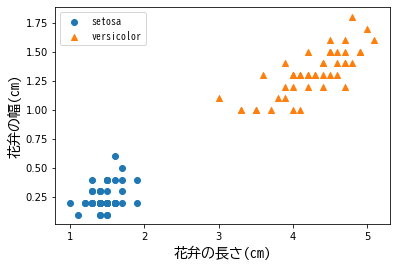

In [58]:
# グラフ表示用にデータを加工
temp_se = data[data["class"] == 0]  # setosa
temp_ve = data[data["class"] == 1]  # versicolor
temp_vi = data[data["class"] == 2]  # virginica

# データを散布図としてプロット
fig, ax = plt.subplots()
ax.scatter(x=temp_se["petal length (cm)"],
           y=temp_se["petal width (cm)"], marker='o', label="setosa")
ax.scatter(x=temp_ve["petal length (cm)"],
           y=temp_ve["petal width (cm)"], marker='^', label="versicolor")
# ax.scatter(x=temp_vi["petal length (cm)"],
#           y=temp_vi["petal width (cm)"], marker='+', label="virginica")
ax.set_xlabel('花弁の長さ(cm)', fontproperties=JP)
ax.set_ylabel('花弁の幅(cm)', fontproperties=JP)

# 決定境界をプロット
#ax.plot(X_train_scaled, X_train_scaled * a + b)
ax.legend(prop=JPFONT)  # 汎用ラベル表示
plt.show()


In [86]:
# 0:setosa, 1:versicolor を抽出
X = data.loc[data["class"].isin([0, 1]), "petal length (cm)":"petal width (cm)"]
Y = data.loc[data["class"].isin([0, 1]), "class"]


In [102]:
# 学習用とテスト用でデータを分離してモデル化を実施
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, stratify=Y, random_state=0)
svm = LinearSVC()
svm.fit(X_train, Y_train)
print(svm)
print("係数 = ", svm.coef_)
print("切片 = ", svm.intercept_)
a = -svm.coef_[0][0]/svm.coef_[0][1]
b = -svm.intercept_[0]/svm.coef_[0][1]
print(f"y = x * {a} + {b}")


LinearSVC()
係数 =  [[0.59833181 0.80858975]]
切片 =  [-2.06129087]
y = x * -0.7399695766805664 + 2.549241898923535


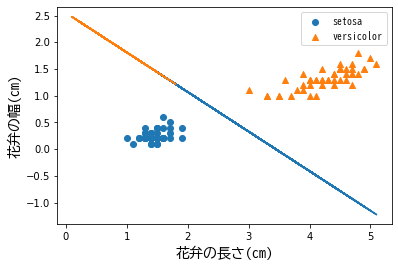

In [105]:
# 境界線を付記
fig, ax = plt.subplots()
ax.set_xlabel('花弁の長さ(cm)', fontproperties=JP)
ax.set_ylabel('花弁の幅(cm)', fontproperties=JP)

ax.scatter(x=temp_se["petal length (cm)"],
           y=temp_se["petal width (cm)"], marker='o', label="setosa")
ax.scatter(x=temp_ve["petal length (cm)"],
           y=temp_ve["petal width (cm)"], marker='^', label="versicolor")

# 決定境界をプロット
# mglearn.plots.plot_2d_separator(svm, X)
ax.plot(X_train, X_train * a + b)
ax.legend(prop=JPFONT)  # 汎用ラベル表示
plt.show()
